In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from datetime import datetime



In [2]:
world = pd.read_csv("owid-covid-data.csv", sep = ",")

Extraigo las columnas necesarias para el análisis de tendencias por columnas y el posterior de peor momento para ir a los paises (columnas _per_million)

Analisis de tendencias por columnas: columnas de estudio: Descarto las weekly_ por la cantidad de nulos. Los paises europeos tienen mejor calidad de datos que Turquia y Venezuela, cuya cantidad de NaNs me hace descartar algunas columnas mas.

Elimino las que tienen muchos valores nulos 

icu_patients                             54154
icu_patients_per_million                 54154
hosp_patients                            53103
hosp_patients_per_million                53103
weekly_icu_admissions                    60119
weekly_icu_admissions_per_million        60119
weekly_hosp_admissions                   59743
weekly_hosp_admissions_per_million       59743
new_tests                                32672
total_tests                              32853
total_tests_per_thousand                 32853
new_tests_per_thousand                   32672
new_tests_smoothed                       29207
new_tests_smoothed_per_thousand          29207
tests_per_case                           31440
tests_units                              28050
total_vaccinations                       60083
new_vaccinations                         60252
new_vaccinations_smoothed                59872
total_vaccinations_per_hundred           60083
new_vaccinations_smoothed_per_million    59872
female_smokers                           14609
male_smokers                             15240
handwashing_facilities                   31473
extreme_poverty                          21146

Descarto las columnas con datos estimados (_smoothed), continent y location

Descarto las columnas que tienen un valor fijo o que no proporcionan unformación de tendencias.
median_age                                2949
aged_65_older                             3619
aged_70_older                             3276
gdp_per_capita                            2920
cardiovasc_death_rate                     2319
diabetes_prevalence                       1644
hospital_beds_per_thousand                7063
life_expectancy                            656
human_development_index                   2662

#Columnas en el DataFrame de estudio de tendencias

iso_code                                   346
date                                         0
total_cases                                585
new_cases                                  592
total_deaths                              9048
new_deaths                                9049
reproduction_rate                        11938
stringency_index                          6777
positive_rate                            30965 Uso esta columna a pesar de su alto valor de nulos


total_cases_per_million                    931
new_cases_per_million                      938
total_deaths_per_million                  9381
new_deaths_per_million                    9382
icu_patients_per_million                 54154
hosp_patients_per_million                53103


In [3]:
world_cols = world.drop(world.columns.difference(['iso_code', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths','total_cases_per_million','new_cases_per_million','total_deaths_per_million', 'new_deaths_per_million','reproduction_rate', 'stringency_index']), 1)

In [6]:
world_cols.isnull().sum()

iso_code                       346
date                             0
total_cases                    585
new_cases                      592
total_deaths                  9048
new_deaths                    9049
total_cases_per_million        931
new_cases_per_million          938
total_deaths_per_million      9381
new_deaths_per_million        9382
reproduction_rate            11938
icu_patients_per_million     54154
hosp_patients_per_million    53103
positive_rate                30965
stringency_index              6777
dtype: int64

In [4]:
gbr = world_cols[world_cols["iso_code"]=="GBR"]
prt = world_cols[world_cols["iso_code"]=="PRT"]
ven = world_cols[world_cols["iso_code"]=="VEN"]
tur = world_cols[world_cols["iso_code"]=="TUR"]
esp = world_cols[world_cols["iso_code"]=="ESP"]

In [5]:
gbr.dropna(how = 'any', inplace = True)
esp.dropna(how = 'any', inplace = True)
prt.dropna(how = 'any', inplace = True)
tur.dropna(how = 'any', inplace = True)
ven.dropna(how = 'any', inplace = True)

In [6]:

ven

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,stringency_index
58781,VEN,2020-03-27,107.0,0.0,1.0,1.0,3.763,0.000,0.035,0.035,0.56,82.41
58782,VEN,2020-03-28,119.0,12.0,2.0,1.0,4.185,0.422,0.070,0.035,0.58,82.41
58783,VEN,2020-03-29,119.0,0.0,2.0,0.0,4.185,0.000,0.070,0.000,0.58,82.41
58784,VEN,2020-03-30,135.0,16.0,3.0,1.0,4.748,0.563,0.106,0.035,0.60,82.41
58785,VEN,2020-03-31,135.0,0.0,3.0,0.0,4.748,0.000,0.106,0.000,0.59,82.41
...,...,...,...,...,...,...,...,...,...,...,...,...
59064,VEN,2021-01-04,114407.0,177.0,1038.0,4.0,4023.324,6.225,36.503,0.141,0.92,90.74
59065,VEN,2021-01-05,114662.0,255.0,1042.0,4.0,4032.291,8.968,36.644,0.141,0.95,90.74
59066,VEN,2021-01-06,114908.0,246.0,1047.0,5.0,4040.942,8.651,36.820,0.176,0.97,90.74
59067,VEN,2021-01-07,115322.0,414.0,1052.0,5.0,4055.501,14.559,36.995,0.176,0.99,90.74


In [6]:
# Columnas de estudio de los 5 paises analizados
countries_cols = pd.concat([gbr, prt, ven, tur, esp])
countries_cols.columns
countries_cols.isnull().sum()

iso_code                    0
date                        0
total_cases                 0
new_cases                   0
total_deaths                0
new_deaths                  0
total_cases_per_million     0
new_cases_per_million       0
total_deaths_per_million    0
new_deaths_per_million      0
reproduction_rate           0
stringency_index            0
dtype: int64

In [8]:
countries_cols.sort_values(by = ['date'], inplace=True)
countries_cols.reset_index(drop =True)


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,stringency_index
0,ESP,2020-03-03,165.0,45.0,1.0,1.0,3.529,0.962,0.021,0.021,2.53,11.11
1,ESP,2020-03-04,222.0,57.0,2.0,1.0,4.748,1.219,0.043,0.021,2.53,11.11
2,ESP,2020-03-05,259.0,37.0,3.0,1.0,5.540,0.791,0.064,0.021,2.52,11.11
3,GBR,2020-03-06,374.0,79.0,1.0,1.0,5.509,1.164,0.015,0.015,2.19,11.11
4,ESP,2020-03-06,400.0,141.0,5.0,2.0,8.555,3.016,0.107,0.043,2.53,11.11
...,...,...,...,...,...,...,...,...,...,...,...,...
1496,GBR,2021-01-08,2966244.0,68192.0,79965.0,1333.0,43694.485,1004.507,1177.931,19.636,1.25,79.63
1497,PRT,2021-01-08,466709.0,10176.0,7590.0,118.0,45770.561,997.969,744.358,11.572,1.52,67.59
1498,VEN,2021-01-08,115667.0,345.0,1056.0,4.0,4067.634,12.133,37.136,0.141,1.00,90.74
1499,TUR,2021-01-08,2307581.0,11479.0,22450.0,186.0,27360.760,136.105,266.187,2.205,0.73,65.28


In [9]:
esp

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,stringency_index
50869,ESP,2020-03-03,165.0,45.0,1.0,1.0,3.529,0.962,0.021,0.021,2.53,11.11
50870,ESP,2020-03-04,222.0,57.0,2.0,1.0,4.748,1.219,0.043,0.021,2.53,11.11
50871,ESP,2020-03-05,259.0,37.0,3.0,1.0,5.540,0.791,0.064,0.021,2.52,11.11
50872,ESP,2020-03-06,400.0,141.0,5.0,2.0,8.555,3.016,0.107,0.043,2.53,11.11
50873,ESP,2020-03-07,500.0,100.0,10.0,5.0,10.694,2.139,0.214,0.107,2.52,11.11
...,...,...,...,...,...,...,...,...,...,...,...,...
51176,ESP,2021-01-04,1958844.0,30579.0,51078.0,241.0,41896.120,654.029,1092.466,5.155,1.36,78.70
51177,ESP,2021-01-05,1982544.0,23700.0,51430.0,352.0,42403.020,506.900,1099.994,7.529,1.37,78.70
51178,ESP,2021-01-06,1982544.0,0.0,51430.0,0.0,42403.020,0.000,1099.994,0.000,1.38,78.70
51179,ESP,2021-01-07,2024904.0,42360.0,51675.0,245.0,43309.024,906.004,1105.235,5.240,1.40,71.30


In [7]:
esp.sort_values(by = ['date'], inplace=True)
gbr.sort_values(by = ['date'], inplace=True)
prt.sort_values(by = ['date'], inplace=True)
tur.sort_values(by = ['date'], inplace=True)
ven.sort_values(by = ['date'], inplace=True)


In [8]:
esp.reset_index(drop =True)
gbr.reset_index(drop =True)
prt.reset_index(drop =True)
tur.reset_index(drop =True)
ven.reset_index(drop =True)


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,stringency_index
0,VEN,2020-03-27,107.0,0.0,1.0,1.0,3.763,0.000,0.035,0.035,0.56,82.41
1,VEN,2020-03-28,119.0,12.0,2.0,1.0,4.185,0.422,0.070,0.035,0.58,82.41
2,VEN,2020-03-29,119.0,0.0,2.0,0.0,4.185,0.000,0.070,0.000,0.58,82.41
3,VEN,2020-03-30,135.0,16.0,3.0,1.0,4.748,0.563,0.106,0.035,0.60,82.41
4,VEN,2020-03-31,135.0,0.0,3.0,0.0,4.748,0.000,0.106,0.000,0.59,82.41
...,...,...,...,...,...,...,...,...,...,...,...,...
283,VEN,2021-01-04,114407.0,177.0,1038.0,4.0,4023.324,6.225,36.503,0.141,0.92,90.74
284,VEN,2021-01-05,114662.0,255.0,1042.0,4.0,4032.291,8.968,36.644,0.141,0.95,90.74
285,VEN,2021-01-06,114908.0,246.0,1047.0,5.0,4040.942,8.651,36.820,0.176,0.97,90.74
286,VEN,2021-01-07,115322.0,414.0,1052.0,5.0,4055.501,14.559,36.995,0.176,0.99,90.74


In [9]:
esp['date'] = pd.to_datetime(esp['date'])
gbr['date'] = pd.to_datetime(gbr['date'])
prt['date'] = pd.to_datetime(prt['date'])
tur['date'] = pd.to_datetime(tur['date'])
ven['date'] = pd.to_datetime(ven['date'])



In [13]:
esp

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,stringency_index
50869,ESP,2020-03-03,165.0,45.0,1.0,1.0,3.529,0.962,0.021,0.021,2.53,11.11
50870,ESP,2020-03-04,222.0,57.0,2.0,1.0,4.748,1.219,0.043,0.021,2.53,11.11
50871,ESP,2020-03-05,259.0,37.0,3.0,1.0,5.540,0.791,0.064,0.021,2.52,11.11
50872,ESP,2020-03-06,400.0,141.0,5.0,2.0,8.555,3.016,0.107,0.043,2.53,11.11
50873,ESP,2020-03-07,500.0,100.0,10.0,5.0,10.694,2.139,0.214,0.107,2.52,11.11
...,...,...,...,...,...,...,...,...,...,...,...,...
51176,ESP,2021-01-04,1958844.0,30579.0,51078.0,241.0,41896.120,654.029,1092.466,5.155,1.36,78.70
51177,ESP,2021-01-05,1982544.0,23700.0,51430.0,352.0,42403.020,506.900,1099.994,7.529,1.37,78.70
51178,ESP,2021-01-06,1982544.0,0.0,51430.0,0.0,42403.020,0.000,1099.994,0.000,1.38,78.70
51179,ESP,2021-01-07,2024904.0,42360.0,51675.0,245.0,43309.024,906.004,1105.235,5.240,1.40,71.30


In [10]:
esp.reset_index(drop=True, inplace= True)


In [15]:
#esp.drop_duplicates(esp['new_cases'])
esp.drop_duplicates()
#esp.sort_values

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,stringency_index
0,ESP,2020-03-03,165.0,45.0,1.0,1.0,3.529,0.962,0.021,0.021,2.53,11.11
1,ESP,2020-03-04,222.0,57.0,2.0,1.0,4.748,1.219,0.043,0.021,2.53,11.11
2,ESP,2020-03-05,259.0,37.0,3.0,1.0,5.540,0.791,0.064,0.021,2.52,11.11
3,ESP,2020-03-06,400.0,141.0,5.0,2.0,8.555,3.016,0.107,0.043,2.53,11.11
4,ESP,2020-03-07,500.0,100.0,10.0,5.0,10.694,2.139,0.214,0.107,2.52,11.11
...,...,...,...,...,...,...,...,...,...,...,...,...
307,ESP,2021-01-04,1958844.0,30579.0,51078.0,241.0,41896.120,654.029,1092.466,5.155,1.36,78.70
308,ESP,2021-01-05,1982544.0,23700.0,51430.0,352.0,42403.020,506.900,1099.994,7.529,1.37,78.70
309,ESP,2021-01-06,1982544.0,0.0,51430.0,0.0,42403.020,0.000,1099.994,0.000,1.38,78.70
310,ESP,2021-01-07,2024904.0,42360.0,51675.0,245.0,43309.024,906.004,1105.235,5.240,1.40,71.30


In [83]:

esp_rare1 = esp.sort_values(['new_cases']).head(20)
esp_rare2 = esp.sort_values(['new_deaths_per_million']).head(20)
esp_rare2

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,stringency_index
83,ESP,2020-05-25,235400.0,-372.0,26834.0,-1918.0,5034.779,-7.956,573.931,-41.023,0.82,75.46
162,ESP,2020-08-12,329784.0,3172.0,28579.0,-2.0,7053.482,67.843,611.253,-0.043,1.43,60.65
180,ESP,2020-08-30,439286.0,0.0,29011.0,0.0,9395.531,0.000,620.493,0.000,1.31,62.50
144,ESP,2020-07-25,272421.0,0.0,28432.0,0.0,5826.591,0.000,608.109,0.000,1.53,64.35
145,ESP,2020-07-26,272421.0,0.0,28432.0,0.0,5826.591,0.000,608.109,0.000,1.53,64.35
151,ESP,2020-08-01,288522.0,0.0,28445.0,0.0,6170.962,0.000,608.387,0.000,1.49,64.35
152,ESP,2020-08-02,288522.0,0.0,28445.0,0.0,6170.962,0.000,608.387,0.000,1.50,64.35
158,ESP,2020-08-08,314362.0,0.0,28503.0,0.0,6723.633,0.000,609.627,0.000,1.44,64.35
159,ESP,2020-08-09,314362.0,0.0,28503.0,0.0,6723.633,0.000,609.627,0.000,1.44,64.35
165,ESP,2020-08-15,342813.0,0.0,28617.0,0.0,7332.148,0.000,612.066,0.000,1.41,62.50


In [11]:
%matplotlib inline

In [12]:
plt.rcParams['figure.figsize'] = (15, 5)

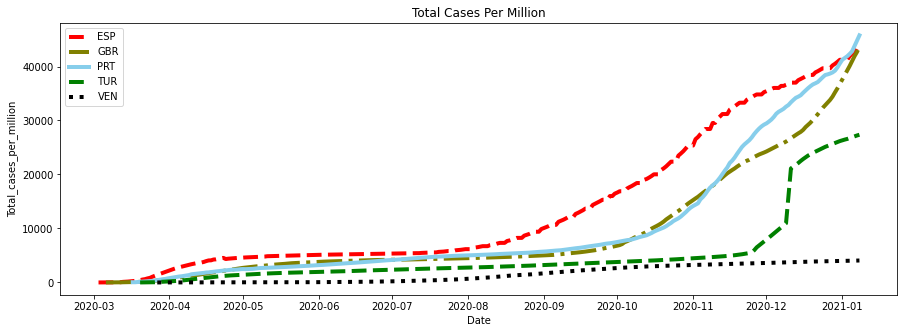

In [13]:
plt.plot("date", "total_cases_per_million", data = esp, linestyle='--', linewidth = 4, color='red', label = 'ESP')
plt.plot("date", "total_cases_per_million", data = gbr, linestyle='dashdot', linewidth = 4, color='olive', label = 'GBR')
plt.plot("date", "total_cases_per_million", data = prt, linestyle='solid',linewidth = 4, color='skyblue', label = 'PRT')
plt.plot("date", "total_cases_per_million", data = tur, linestyle='dashed', linewidth = 4, color='green', label = 'TUR')
plt.plot("date", "total_cases_per_million", data = ven, linestyle='dotted', linewidth = 4, color='black', label = 'VEN')


plt.title('Total Cases Per Million')
plt.xlabel('Date')
plt.ylabel('Total_cases_per_million')
plt.legend()

plt.show()

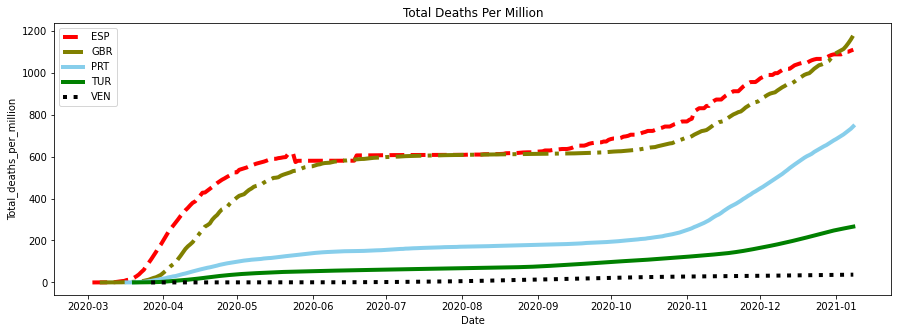

In [23]:
plt.plot("date", "total_deaths_per_million", data = esp, linestyle='--', linewidth = 4, color='red', label = 'ESP')
plt.plot("date", "total_deaths_per_million", data = gbr, linestyle='dashdot', linewidth = 4, color='olive', label = 'GBR')
plt.plot("date", "total_deaths_per_million", data = prt, linestyle='solid',linewidth = 4, color='skyblue', label = 'PRT')
plt.plot("date", "total_deaths_per_million", data = tur, linestyle='-', linewidth = 4, color='green', label = 'TUR')
plt.plot("date", "total_deaths_per_million", data = ven, linestyle='dotted', linewidth = 4, color='black', label = 'VEN')

#plt.vlines(x=[2020-4], ymin=0, ymax=20000000)

plt.title('Total Deaths Per Million')
plt.xlabel('Date')
plt.ylabel('Total_deaths_per_million')
plt.legend()

plt.show()

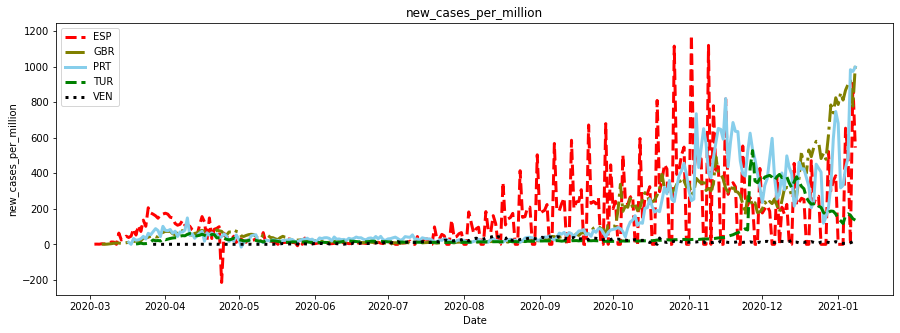

In [59]:
plt.plot("date", "new_cases_per_million", data = esp, linestyle='--', linewidth = 3, color='red', label = 'ESP')
plt.plot("date", "new_cases_per_million", data = gbr, linestyle='dashdot', linewidth = 3, color='olive', label = 'GBR')
plt.plot("date", "new_cases_per_million", data = prt, linestyle='solid',linewidth = 3, color='skyblue', label = 'PRT')
plt.plot("date", "new_cases_per_million", data = tur, linestyle='dashed', linewidth = 3, color='green', label = 'TUR')
plt.plot("date", "new_cases_per_million", data = ven, linestyle='dotted', linewidth = 3, color='black', label = 'VEN')

plt.title('new_cases_per_million')
plt.xlabel('Date')
plt.ylabel('new_cases_per_million')
plt.legend()

plt.show()

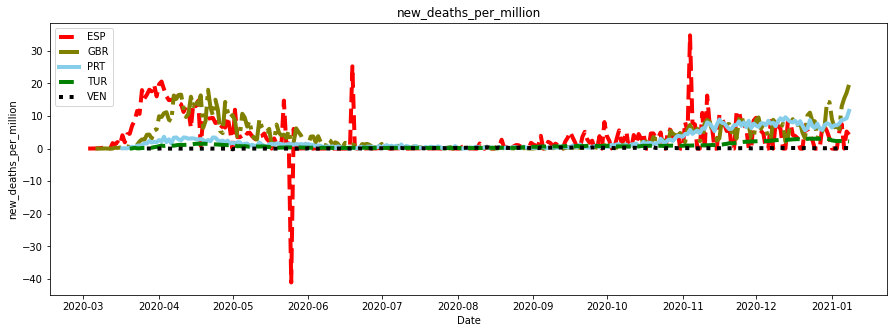

In [68]:
plt.plot("date", "new_deaths_per_million", data = esp, linestyle='--', linewidth = 4, color='red', label = 'ESP')
plt.plot("date", "new_deaths_per_million", data = gbr, linestyle='dashdot', linewidth = 4, color='olive', label = 'GBR')
plt.plot("date", "new_deaths_per_million", data = prt, linestyle='solid',linewidth = 4, color='skyblue', label = 'PRT')
plt.plot("date", "new_deaths_per_million", data = tur, linestyle='dashed', linewidth = 4, color='green', label = 'TUR')
plt.plot("date", "new_deaths_per_million", data = ven, linestyle='dotted', linewidth = 4, color='black', label = 'VEN')

#plt.plot("date", "new_deaths_per_million", data = countries_cols, linestyle='dotted', linewidth = 1, color='yellow', label = 'countries')

plt.title('new_deaths_per_million')
plt.xlabel('Date')
plt.ylabel('new_deaths_per_million')
plt.legend()

plt.show()

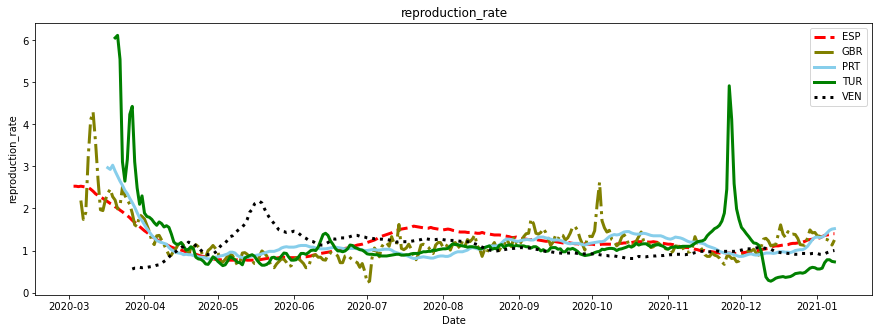

In [62]:
plt.plot("date", "reproduction_rate", data = esp, linestyle='--', linewidth = 3, color='red', label = 'ESP')
plt.plot("date", "reproduction_rate", data = gbr, linestyle='dashdot', linewidth = 3, color='olive', label = 'GBR')
plt.plot("date", "reproduction_rate", data = prt, linestyle='solid',linewidth = 3, color='skyblue', label = 'PRT')
plt.plot("date", "reproduction_rate", data = tur, linestyle='-', linewidth = 3, color='green', label = 'TUR')
plt.plot("date", "reproduction_rate", data = ven, linestyle='dotted', linewidth = 3, color='black', label = 'VEN')

plt.title('reproduction_rate')
plt.xlabel('Date')
plt.ylabel('reproduction_rate')
plt.legend()

plt.show()

ANALISIS DEL PEOR MOMENTO PARA IR CON LAS COLUMNAS DESGINADAS CON PER_MILLION 

In [55]:
"""PER MILLION"""
countries_cols.loc[countries_cols["total_cases_per_million"] == countries_cols["total_cases_per_million"].max()]


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,stringency_index
43910,PRT,2021-01-08,466709.0,10176.0,7590.0,118.0,45770.561,997.969,744.358,11.572,1.52,67.59


In [88]:
countries_cols.loc[countries_cols["new_cases_per_million"] == countries_cols["new_cases_per_million"].max()]


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,positive_rate,stringency_index
51113,ESP,2020-11-02,1240697.0,55019.0,36257.0,379.0,26536.258,1176.757,775.471,8.106,1.15,56.679,410.012,0.121,71.3


In [90]:
countries_cols.loc[countries_cols["total_deaths_per_million"] == countries_cols["total_deaths_per_million"].max()]


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,positive_rate,stringency_index
57389,GBR,2021-01-08,2966244.0,68192.0,79965.0,1333.0,43694.485,1004.507,1177.931,19.636,1.25,45.635,496.155,0.112,79.63


In [91]:
countries_cols.loc[countries_cols["new_deaths_per_million"] == countries_cols["new_deaths_per_million"].max()]


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,positive_rate,stringency_index
51115,ESP,2020-11-04,1284408.0,25042.0,38118.0,1623.0,27471.157,535.603,815.275,34.713,1.12,59.587,434.715,0.127,71.3


In [92]:
countries_cols.loc[countries_cols["icu_patients_per_million"] == countries_cols["icu_patients_per_million"].max()]


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,positive_rate,stringency_index
51127,ESP,2020-11-16,1496864.0,38273.0,41253.0,484.0,32015.206,818.59,882.327,10.352,1.0,67.501,437.431,0.104,71.3


In [94]:
countries_cols.loc[countries_cols["hosp_patients_per_million"] == countries_cols["hosp_patients_per_million"].max()]

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,icu_patients_per_million,hosp_patients_per_million,positive_rate,stringency_index
57389,GBR,2021-01-08,2966244.0,68192.0,79965.0,1333.0,43694.485,1004.507,1177.931,19.636,1.25,45.635,496.155,0.112,79.63
